# K Means Color Quantization

### Imports


In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### The Image

In [2]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

In [3]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

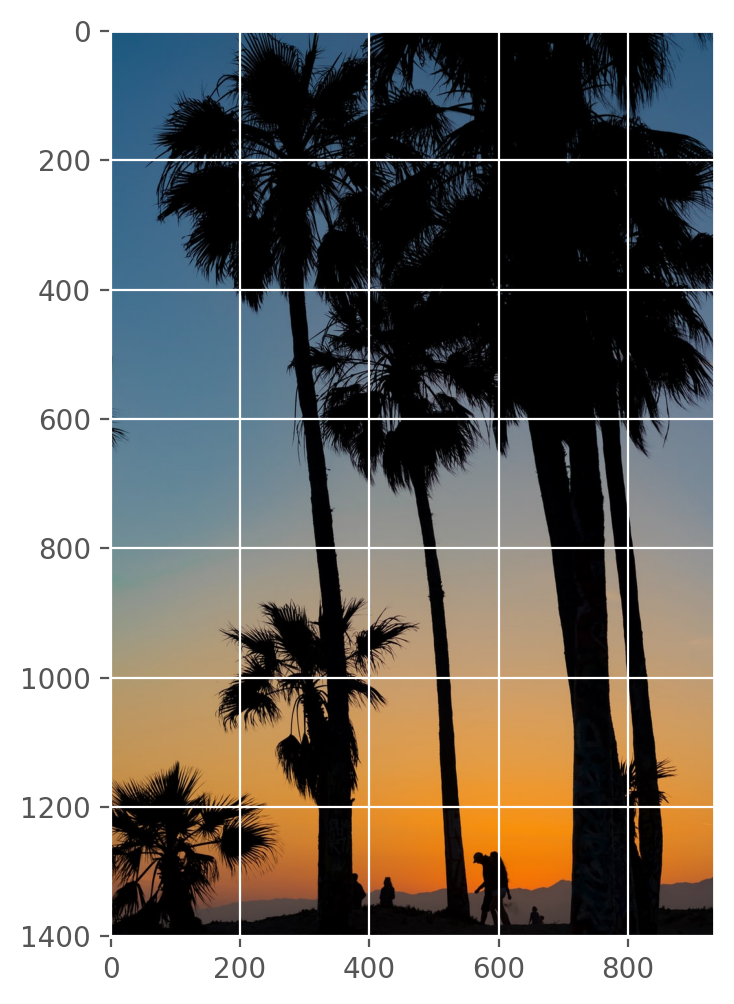

In [4]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [5]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [6]:
(h,w,c) = image_as_array.shape

In [7]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [8]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [9]:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=7)

In [11]:
model

KMeans(n_clusters=7)

In [12]:
labels = model.fit_predict(image_as_array2d)

In [13]:
labels

array([4, 4, 4, ..., 0, 0, 0])

In [14]:
# THESE ARE THE 3 RGB COLOR CODES!
model.cluster_centers_

array([[  2.74995063,   2.55807373,   3.67318891],
       [ 99.9547362 , 128.36028242, 146.47891858],
       [219.64805298, 132.22326747,  41.55037951],
       [154.60316991, 149.44029088, 138.65289256],
       [ 58.31300255,  98.42827045, 130.25548941],
       [ 68.07128718,  60.67780558,  59.63013416],
       [200.62616265, 154.20102154,  98.32520079]])

In [15]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [16]:
rgb_codes

array([[  3,   3,   4],
       [100, 128, 146],
       [220, 132,  42],
       [155, 149, 139],
       [ 58,  98, 130],
       [ 68,  61,  60],
       [201, 154,  98]])

In [17]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [18]:
quantized_image

array([[[ 58,  98, 130],
        [ 58,  98, 130],
        [ 58,  98, 130],
        ...,
        [ 68,  61,  60],
        [ 58,  98, 130],
        [ 58,  98, 130]],

       [[ 58,  98, 130],
        [ 58,  98, 130],
        [ 58,  98, 130],
        ...,
        [ 58,  98, 130],
        [ 58,  98, 130],
        [ 58,  98, 130]],

       [[ 58,  98, 130],
        [ 58,  98, 130],
        [ 58,  98, 130],
        ...,
        [ 58,  98, 130],
        [ 58,  98, 130],
        [ 58,  98, 130]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

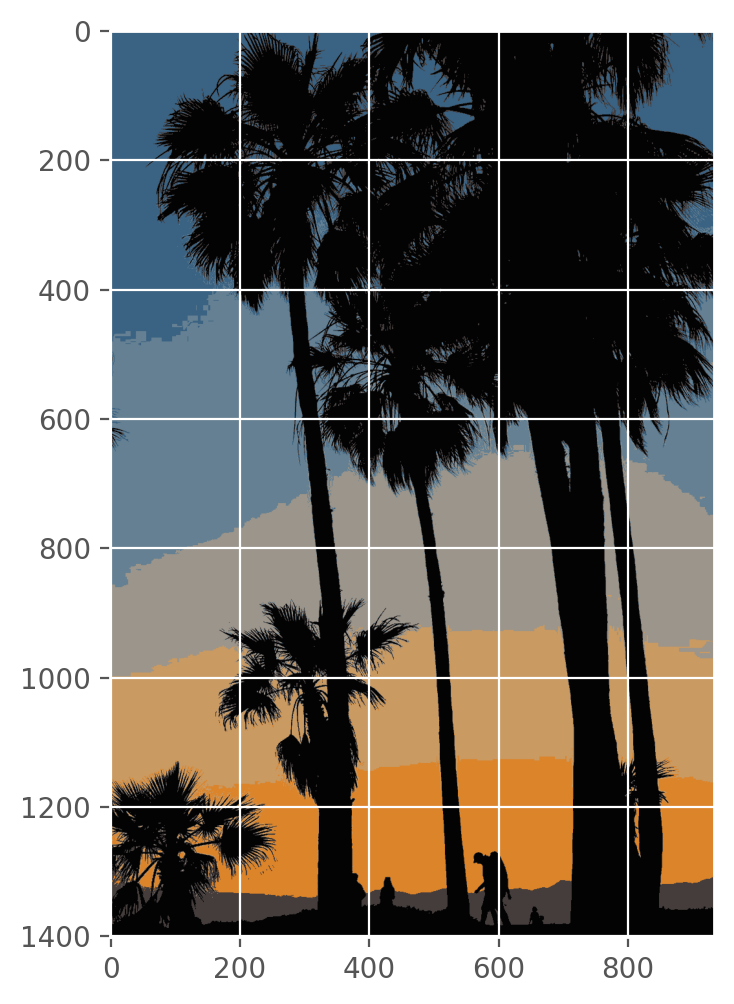

In [19]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)